In [ ]:
#1. Install Dependencies and Setup



In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#2. REMOVE DODGY IMAGES

In [ ]:
data_dir = 'data' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [21]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
Issue with image data\happy\1000_F_38064890_H0vhLXPugCMaxRnEzXtASpmml1NKhqrp.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1920px-face-smile-svg_.png
Issue with image data\happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg
Issue with image data\happy\343515-worldhappinessreport1440.jpg
Issue with image data\happy\35438_hd.jpg
Issue with image data\happy\360_F_230964014_ngHsPlPbY2MCa0enKBex6YLNdTB24pki.jpg
Issue with image data\happy\360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
Issue with image data\happy\360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
Issue with image data\happy\4239f3d51d092f69d529f372a37b4601.jpg
Issue with image data\happy\56f455011e0000b

In [22]:
#3 LOAD DATA


In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

In [31]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
#SCALE DATA

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [29]:
data.as_numpy_iterator().next()

(array([[[[0.99019605, 1.        , 0.96666664],
          [0.99313724, 0.99215686, 0.9637255 ],
          [0.99215686, 0.9990196 , 0.9588235 ],
          ...,
          [0.99215686, 1.        , 0.9862745 ],
          [1.        , 1.        , 1.        ],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.9936274 , 0.99852943, 0.9632353 ],
          [0.99215686, 1.        , 0.9529412 ],
          [0.99607843, 0.99607843, 0.95686275],
          ...,
          [0.9882353 , 0.99607843, 0.9764706 ],
          [0.99215686, 1.        , 0.9823529 ],
          [0.99607843, 0.9990196 , 0.9823529 ]],
 
         [[0.9789216 , 0.97205883, 0.952451  ],
          [0.9941176 , 0.99852943, 0.96617645],
          [0.9941176 , 0.9916667 , 0.96862745],
          ...,
          [0.9823529 , 0.9990196 , 0.9764706 ],
          [0.99313724, 0.9970588 , 0.97745097],
          [0.9882353 , 0.99607843, 0.9764706 ]],
 
         ...,
 
         [[0.74607843, 0.7916667 , 0.8602941 ],
          [0.65147

In [32]:
#SPLIT DATA

In [33]:
size = len(data)
print(size)

6


In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [35]:

train_size

4

In [36]:
val_size

1

In [37]:
test_size

1

In [38]:
#TRAINING DATA


In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [40]:
#BULIDING DEEP LEARNING MODEL

In [41]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:

model = Sequential()

In [44]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#TRAIN


In [48]:
logdir='logs'

In [49]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#EVALUATE 

In [139]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [140]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [141]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [142]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [145]:
#TEST

In [152]:

import cv2

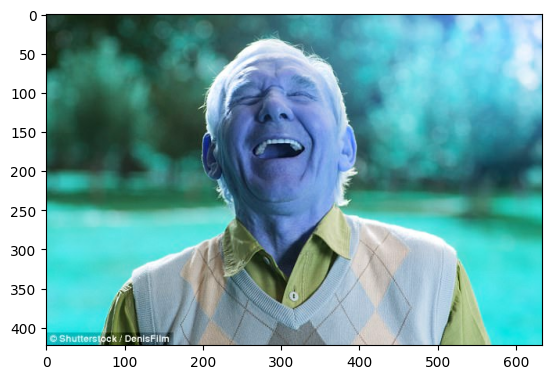

In [154]:
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

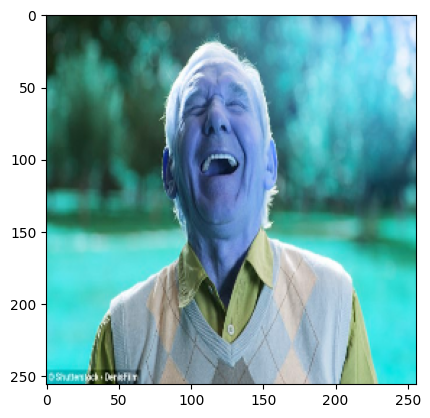

In [156]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [157]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [158]:
yhat

array([[0.6662004]], dtype=float32)

In [164]:
if yhat > 0.8: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [165]:
#SAVE THE MODEL

In [166]:
from tensorflow.keras.models import load_model